<a href="https://colab.research.google.com/github/mhdadizadeh/CICDDoS2019/blob/master/DM_Project_MHDadizadeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read the file from sourse

In [ ]:
!wget http://205.174.165.80/CICDataset/CICDDoS2019/Dataset/CSVs/CSV-03-11.zip

--2022-05-15 05:53:17--  http://205.174.165.80/CICDataset/CICDDoS2019/Dataset/CSVs/CSV-03-11.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918815761 (876M) [application/zip]
Saving to: ‘CSV-03-11.zip.1’

CSV-03-11.zip.1     100%[===================>] 876.25M  9.85MB/s    in 4m 33s  

2022-05-15 05:57:51 (3.21 MB/s) - ‘CSV-03-11.zip.1’ saved [918815761/918815761]



In [ ]:
!unzip CSV-03-11.zip

Archive:  CSV-03-11.zip
replace 03-11/UDPLag.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 03-11/UDP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 03-11/.~lock.UDPLag.csv#? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 03-11/LDAP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 03-11/MSSQL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 03-11/NetBIOS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 03-11/Portmap.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 03-11/Syn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
n


# import libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# functions

K-Fold Decision Tree

In [ ]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


def k_Fold_DecisionTree(x_data, y_data): 


  print('K-Fold Decision Tree: ')
  #Loading the dataset
  # X = df_6.drop([' Label'], axis = 1)
  X = x_data
  y = y_data
  

  #Implementing cross validation
  k = 10
  kf = KFold(n_splits=k, random_state=None)

  acc_score = []
  count = 0
  for train_index , test_index in kf.split(X):
      X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train , y_test = y[train_index] , y[test_index]
    
      dtree = DecisionTreeClassifier()
      dtree.fit(X_train,y_train)

      feat_importance = dtree.tree_.compute_feature_importances(normalize=True)
      featuers = X_train.columns

      feature_importance = pd.DataFrame({'feature' : featuers, 'importance': feat_importance}).sort_values(by='importance', ascending = False).head(8)
      score = dtree.score(X_test,y_test)

      print('k' + str(count) + ' - accuracy: ' + str(score))
      count +=1

      pred = dtree.predict(X_test)
      # print(classification_report(y_test,pred))

      acc = dtree.score(X_test,y_test)
      acc_score.append(acc)

      
  avg_acc_score = sum(acc_score)/k
  print('\nAvg accuracy : {}'.format(avg_acc_score))


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def DecisionTree(x,y):
  
  data_X = x
  data_y = y

  k_Fold_DecisionTree(data_X, data_y)

  print('\nGeneral Decision Tree: ')

  X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.30, random_state=101)

  dtree = DecisionTreeClassifier()
  dtree.fit(X_train,y_train)
  
  feat_importance = dtree.tree_.compute_feature_importances(normalize=True)
  featuers = X_train.columns

  feature_importance = pd.DataFrame({'feature' : featuers, 'importance': feat_importance}).sort_values(by='importance', ascending = False).head(8)
  score = dtree.score(X_test,y_test)

  print('accuracy: ' + str(score) + '\n\n')

  pred = dtree.predict(X_test)
  print(classification_report(y_test,pred))
  print('\n\n')

  df_eval = pd.DataFrame({'Label': y_test,'Predicrions':pred}).reset_index(drop=True)
  print(df_eval.head(20))
  print( '\n\n')

  feature_importance.set_index('feature').plot(kind='bar', title='Feature Importance Plot')
  
  visualize_confusion_matrix(y_true=y_test, y_pred=pred)

  visualize_tree(dtree, X_train.columns)

  return score

In [ ]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dthadi.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

visualize_confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def visualize_confusion_matrix(y_true, y_pred):
  conf_matrix = confusion_matrix(y_true, y_pred)
  # Print the confusion matrix using Matplotlib
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

Z-Score

In [ ]:
def z_score(input_df):
    # copy the data
    df_z_scaled = input_df

    # apply normalization techniques
    for column in df_z_scaled.columns:
        df_z_scaled[column] = (df_z_scaled[column] -
                               df_z_scaled[column].mean()) / df_z_scaled[column].std()    

    # view normalized data   
    return df_z_scaled

# Read dataset

In [ ]:
datasets_dic = {}
count = 0

path = r'./03-11'
all_files = glob.glob(path + "/*.csv")
all_files

for file in all_files:
  # print(file)
  chunks = pd.read_csv(file, chunksize=500000)

  chunks_dic = {}
  
  count = 0
  for chunk in chunks:
  
    if(count == 1):
      break  
    
    chunks_dic[count] = chunk 
    count += 1
    # print(count)


  
  datasets_dic[file] = pd.concat(chunks_dic)


initial_df = pd.concat(datasets_dic)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


[862107 702873 586330 513714 303733 186960  34104   1873]


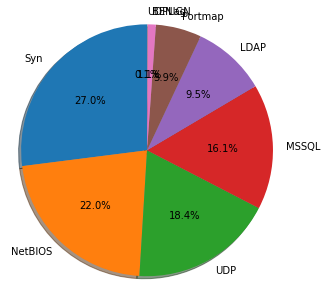

In [ ]:
label_df = pd.DataFrame(initial_df[' Label'].value_counts()).reset_index()
label_df

y = label_df[' Label'].values
mylabels = label_df['index'].values
print(y)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = mylabels
sizes = y
explode = (0, 0, 0, 0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Sampling

In [ ]:
attack_sample_df_dic = {}
labels = label_df['index']
attack_df = initial_df[ initial_df[' Label'] != 'BENIGN' ]
for label in labels:
  attack_sample_df_dic[label] = attack_df[attack_df[' Label'] == label][:1500]

attack_sample_df = pd.concat(attack_sample_df_dic)
# attack_sample_df

In [ ]:
BINIGN_sample_df = initial_df[initial_df[' Label'] == 'BENIGN'][:10500]
# BINIGN_sample_df

[10500  1500  1500  1500  1500  1500  1500  1500]


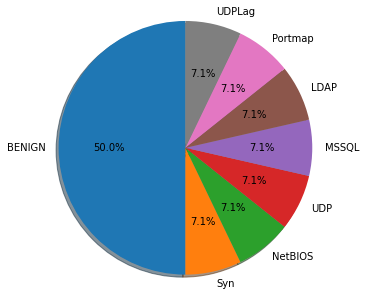

In [ ]:
sampled_df_1 =  pd.concat([attack_sample_df, BINIGN_sample_df])
label_df = pd.DataFrame(sampled_df_1[' Label'].value_counts()).reset_index()
label_df

y = label_df[' Label'].values
mylabels = label_df['index'].values
print(y)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = mylabels
sizes = y
explode = (0, 0, 0, 0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Preprosse

In [ ]:
df = sampled_df_1.copy()

## Delete null and inf values

In [ ]:
df_1 = df.replace(np.inf, np.nan)
df_1.isnull().sum().sum()
# sns.heatmap(df_1 == np.nan)

736

In [ ]:
df_2 = df_1.dropna(axis=0)
df_2.isnull().sum().sum()

0

## Delete unchanged feature

In [ ]:
df_std = pd.DataFrame(df_2.std(), columns = ['value'])
unchange_col = df_std[df_std['value'] == 0].index
df_3 = df_2.drop(unchange_col, axis=1)
df_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
"(Syn, ./03-11/Syn.csv, 0, 0)",445444,172.16.0.5-192.168.50.4-9429-9429-6,172.16.0.5,9429,192.168.50.4,9429,6,2018-11-03 11:36:28.607338,36063894,7,...,29.444864,52.0,1.0,1.202128e+07,6.253623e+06,18628035.0,6193840.0,0,1,Syn
"(Syn, ./03-11/Syn.csv, 0, 1)",113842,172.16.0.5-192.168.50.4-60224-60224-6,172.16.0.5,60224,192.168.50.4,60224,6,2018-11-03 11:36:28.607339,44851366,8,...,0.000000,1.0,1.0,2.066268e+07,1.169783e+07,28934293.0,12391060.0,0,1,Syn
"(Syn, ./03-11/Syn.csv, 0, 2)",176377,172.16.0.5-192.168.50.4-33827-11746-6,192.168.50.4,11746,172.16.0.5,33827,6,2018-11-03 11:36:28.607388,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,Syn
"(Syn, ./03-11/Syn.csv, 0, 4)",85100,172.16.0.5-192.168.50.4-5311-5311-6,172.16.0.5,5311,192.168.50.4,5311,6,2018-11-03 11:36:28.607442,35731470,8,...,33.234019,48.0,1.0,1.191047e+07,1.849493e+06,13693985.0,10001398.0,0,1,Syn
"(Syn, ./03-11/Syn.csv, 0, 5)",54739,172.16.0.5-192.168.50.4-33829-32787-6,172.16.0.5,33829,192.168.50.4,32787,6,2018-11-03 11:36:28.607492,101,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(./03-11/Syn.csv, 0, 482228)",138459,192.168.50.8-74.208.236.171-61057-80-6,192.168.50.8,61057,74.208.236.171,80,6,2018-11-03 12:30:30.178828,54886,1,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN
"(./03-11/Syn.csv, 0, 482229)",2413,192.168.50.9-93.184.216.180-45226-443-6,192.168.50.9,45226,93.184.216.180,443,6,2018-11-03 12:30:33.422544,68,4,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN
"(./03-11/Syn.csv, 0, 482230)",2414,192.168.50.9-93.184.216.180-45226-443-6,192.168.50.9,45226,93.184.216.180,443,6,2018-11-03 12:30:33.422613,2,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN
"(./03-11/Syn.csv, 0, 482231)",2415,192.168.50.9-93.184.216.180-45226-443-6,93.184.216.180,443,192.168.50.9,45226,6,2018-11-03 12:30:33.450979,4,3,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,BENIGN


## Delete useless feature

In [ ]:
df_object = df_3.select_dtypes(include='object')
df_object.columns

Index(['Flow ID', ' Source IP', ' Destination IP', ' Timestamp',
       'SimillarHTTP', ' Label'],
      dtype='object')

In [ ]:
df_4 = df_3.drop(['Flow ID', ' Source IP', ' Destination IP'], axis=1)

In [ ]:
df_4[' Timestamp'].value_counts()

2018-11-03 11:40:04.987018    2
2018-11-03 09:38:23.186376    2
2018-11-03 09:49:35.526272    2
2018-11-03 11:44:33.322910    2
2018-11-03 09:53:34.366334    2
                             ..
2018-11-03 10:21:54.618445    1
2018-11-03 10:21:54.618395    1
2018-11-03 10:21:54.618142    1
2018-11-03 10:21:54.617859    1
2018-11-03 12:30:33.450984    1
Name:  Timestamp, Length: 20627, dtype: int64

In [ ]:
df_4.drop([' Timestamp'], axis=1, inplace = True)

In [ ]:
df_4['SimillarHTTP'].value_counts()

0                                                                                                                                15814
0                                                                                                                                 4457
ocsp.pki.goog/GTSGIAG3                                                                                                              73
ocsp.digicert.com/                                                                                                                  49
ocsp.comodoca.com/                                                                                                                  17
                                                                                                                                 ...  
au.download.windowsupdate.com/c/msdownload/update/software/defu/2018/11/am_delta_5274e47adeaab55df078d67c680437778c675808.exe        1
drmokhberi.ca/2017/11/02/rsyslog-and-syslog-in-linux/  

In [ ]:
df_4.drop(['SimillarHTTP'], axis=1, inplace = True)

In [ ]:
df_4.drop(['Unnamed: 0'], axis=1, inplace = True)

## Delete high corrolated feature

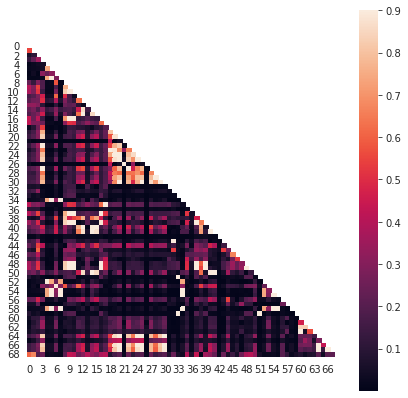

In [ ]:
df_corr = df_4.corr().abs()
corr_val = df_corr.values
corr_val[1][1] = 1
mask = np.zeros_like(corr_val)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr_val, mask=mask, vmax=0.9, square=True)

In [ ]:
high_corr = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
to_drop = [column for column in high_corr.columns if any(high_corr[column] > 0.90)]
to_drop

[' Total Length of Bwd Packets',
 ' Fwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Min Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' RST Flag Count',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 ' Fwd Header Length.1',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 ' Active Min',
 'Idle Mean',
 ' Idle Max',
 ' Idle Min']

In [ ]:
df_5 = df_4.drop(to_drop, axis=1)
df_5

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,...,CWE Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std,Inbound,Label
"(Syn, ./03-11/Syn.csv, 0, 0)",9429,9429,6,36063894,7,2,42.0,6.0,6.0,0.000000,...,0,0.0,5840,0,18.0,29.444864,52.0,6.253623e+06,1,Syn
"(Syn, ./03-11/Syn.csv, 0, 1)",60224,60224,6,44851366,8,4,48.0,6.0,6.0,0.000000,...,0,0.0,5840,0,1.0,0.000000,1.0,1.169783e+07,1,Syn
"(Syn, ./03-11/Syn.csv, 0, 2)",11746,33827,6,1,2,0,12.0,6.0,6.0,0.000000,...,0,0.0,0,-1,0.0,0.000000,0.0,0.000000e+00,0,Syn
"(Syn, ./03-11/Syn.csv, 0, 4)",5311,5311,6,35731470,8,2,48.0,6.0,6.0,0.000000,...,0,0.0,5840,0,24.5,33.234019,48.0,1.849493e+06,1,Syn
"(Syn, ./03-11/Syn.csv, 0, 5)",33829,32787,6,101,2,2,12.0,6.0,6.0,0.000000,...,0,1.0,5840,0,0.0,0.000000,0.0,0.000000e+00,1,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(./03-11/Syn.csv, 0, 482228)",61057,80,6,54886,1,2,6.0,6.0,6.0,0.000000,...,1,2.0,16373,1892,0.0,0.000000,0.0,0.000000e+00,0,BENIGN
"(./03-11/Syn.csv, 0, 482229)",45226,443,6,68,4,0,102.0,39.0,0.0,18.411953,...,0,0.0,627,-1,0.0,0.000000,0.0,0.000000e+00,0,BENIGN
"(./03-11/Syn.csv, 0, 482230)",45226,443,6,2,2,0,24.0,24.0,0.0,16.970563,...,0,0.0,627,-1,0.0,0.000000,0.0,0.000000e+00,0,BENIGN
"(./03-11/Syn.csv, 0, 482231)",443,45226,6,4,3,0,48.0,24.0,0.0,13.856406,...,0,0.0,290,-1,0.0,0.000000,0.0,0.000000e+00,1,BENIGN


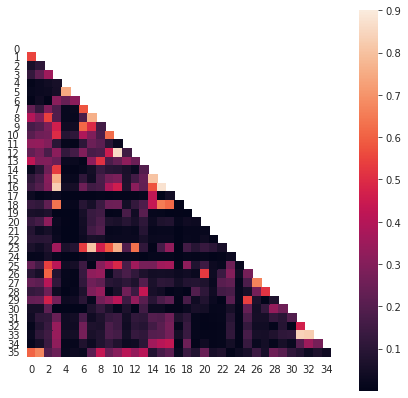

In [ ]:
df_corr = df_5.corr().abs()
corr_val = df_corr.values
corr_val[1][1] = 1
mask = np.zeros_like(corr_val)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr_val, mask=mask, vmax=0.9, square=True)

In [ ]:
df_corr.loc[1, 1] = 1

Delete feature whith many nagative value

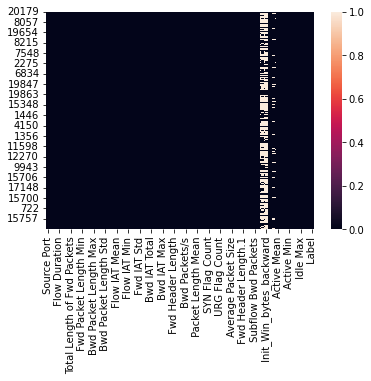

In [ ]:
df_5 = df_4.reset_index()
df_5 = df_5.drop(['index'], axis = 1)
df_5 = df_5.sample(frac = 1)
sns.heatmap(df_5 == -1)

In [ ]:
negative_df = df_5 == -1
number_of_negative_df = pd.DataFrame(negative_df.sum(), columns = ['count']).reset_index()
df_size = len(df_5)
to_drop = number_of_negative_df[number_of_negative_df['count'] > 1]['index'].values


df_6 = df_5.drop(to_drop, axis = 1)
df_6 = df_6.reset_index()
df_6 = df_6.drop(['index'], axis = 1)
df_6 = df_6.sample(frac = 1)

Delete feature whith more than 85% zero value

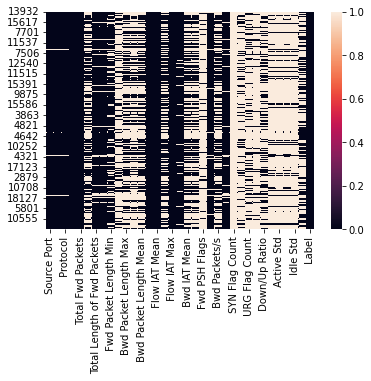

In [ ]:
sns.heatmap(df_6 == 0)

In [ ]:
zero_df = df_6 == 0
number_of_zero_df = pd.DataFrame(zero_df.sum(), columns = ['count']).reset_index()
df_size = len(df_6)
to_drop = number_of_zero_df[number_of_zero_df['count'] > (df_size * 0.85)]['index']
df_7 = df_6.drop(to_drop, axis = 1)

In [ ]:
df_8 = df_7.copy()
df_8.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Flow Packets/s', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', ' Bwd IAT Mean',
       ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Packets/s',
       ' Max Packet Length', ' ACK Flag Count', ' URG Flag Count',
       ' Down/Up Ratio', ' Inbound', ' Label'],
      dtype='object')

## Shuffle dataframe

In [ ]:
df_9 = df_8.sample(frac = 1)
df_9

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,...,Bwd IAT Mean,Bwd IAT Min,Fwd Header Length,Bwd Packets/s,Max Packet Length,ACK Flag Count,URG Flag Count,Down/Up Ratio,Inbound,Label
19767,40936,443,6,60702422,31,25,2436.0,575.0,0.0,185.845594,...,2.525488e+06,2.0,1008,0.411845,2896.0,1,0,0.0,0,BENIGN
1098,26116,26116,6,47999351,10,0,60.0,6.0,6.0,0.000000,...,0.000000e+00,0.0,200,0.000000,6.0,1,0,0.0,1,Syn
19678,443,44634,6,102,1,2,0.0,0.0,0.0,0.000000,...,2.000000e+00,2.0,32,19607.843137,0.0,0,1,2.0,1,BENIGN
3760,61850,57139,17,3,2,0,884.0,442.0,442.0,0.000000,...,0.000000e+00,0.0,16,0.000000,442.0,0,0,0.0,1,UDP
14138,55026,80,6,5290919,5,2,18.0,6.0,0.0,3.286335,...,1.000000e+00,1.0,124,0.378006,6.0,1,0,0.0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11591,36520,443,6,24051,5,2,0.0,0.0,0.0,0.000000,...,3.000000e+00,3.0,176,83.156626,0.0,1,0,0.0,0,BENIGN
4881,61850,4445,17,48,2,0,916.0,458.0,458.0,0.000000,...,0.000000e+00,0.0,-2,0.000000,458.0,0,0,0.0,1,MSSQL
2886,61850,5751,17,4,2,0,884.0,442.0,442.0,0.000000,...,0.000000e+00,0.0,64,0.000000,442.0,0,0,0.0,1,UDP
15128,443,55147,6,1,2,0,431.0,400.0,31.0,260.922402,...,0.000000e+00,0.0,40,0.000000,400.0,0,1,0.0,1,BENIGN


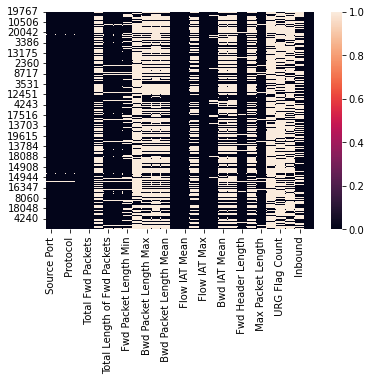

In [ ]:
sns.heatmap(df_9 == 0)

Encoding categorical data

In [ ]:
df_10 = pd.get_dummies(df_9, columns = [' Protocol'])
df_10

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Max,...,Bwd Packets/s,Max Packet Length,ACK Flag Count,URG Flag Count,Down/Up Ratio,Inbound,Label,Protocol_0,Protocol_6,Protocol_17
"(./03-11/Portmap.csv, 0, 2218)",59328,53,20624,2,2,76.0,38.0,38.0,0.000000,90.0,...,96.974399,90.0,0,0,1.0,0,BENIGN,0,0,1
"(MSSQL, ./03-11/UDP.csv, 0, 580)",9907,65484,1,2,0,810.0,405.0,405.0,0.000000,0.0,...,0.000000,405.0,0,0,0.0,1,MSSQL,0,0,1
"(./03-11/UDP.csv, 0, 18961)",55438,443,36274757,10,12,476.0,174.0,6.0,68.590897,80.0,...,0.330809,174.0,0,1,1.0,0,BENIGN,0,1,0
"(./03-11/UDP.csv, 0, 25589)",56374,53,20667,2,2,50.0,25.0,25.0,0.000000,41.0,...,96.772633,41.0,0,0,1.0,0,BENIGN,0,0,1
"(Portmap, ./03-11/Portmap.csv, 0, 3291)",62139,62476,3,2,0,1096.0,548.0,548.0,0.000000,0.0,...,0.000000,548.0,0,0,0.0,1,Portmap,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(./03-11/Portmap.csv, 0, 5648)",63968,53,20741,2,2,180.0,90.0,90.0,0.000000,106.0,...,96.427366,106.0,0,0,1.0,0,BENIGN,0,0,1
"(UDP, ./03-11/UDP.csv, 0, 27159)",44857,17840,109986,4,0,1398.0,369.0,330.0,22.516660,0.0,...,0.000000,369.0,0,0,0.0,1,UDP,0,0,1
"(./03-11/Portmap.csv, 0, 5373)",59838,443,61584544,22,24,1052.0,176.0,6.0,64.264066,80.0,...,0.389708,176.0,0,1,1.0,0,BENIGN,0,1,0
"(LDAP, ./03-11/MSSQL.csv, 0, 187)",760,35798,1,2,0,2944.0,1472.0,1472.0,0.000000,0.0,...,0.000000,1472.0,0,0,0.0,1,LDAP,0,0,1


In [ ]:
destination_port_df = pd.DataFrame(df_10[' Destination Port'].value_counts())
dp_df_size = len(destination_port_df)
unmost_port = destination_port_df.tail(dp_df_size - 10).index
df_11 = df_10.copy()
df_11 = df_10.replace(to_replace = unmost_port, value =99999)
df_11 = pd.get_dummies(df_11, columns = [' Destination Port'])
df_11

,Source Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Destination Port_21,Destination Port_22,Destination Port_53,Destination Port_80,Destination Port_137,Destination Port_443,Destination Port_465,Destination Port_5355,Destination Port_33434,Destination Port_99999
"(./03-11/Portmap.csv, 0, 2218)",59328,20624,2,2,76.0,38.0,38.0,0.000000,90.0,90.0,...,0,0,1,0,0,0,0,0,0,0
"(MSSQL, ./03-11/UDP.csv, 0, 580)",9907,1,2,0,810.0,99999.0,99999.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
"(./03-11/UDP.csv, 0, 18961)",55438,36274757,10,12,476.0,174.0,6.0,68.590897,80.0,6.0,...,0,0,0,0,0,1,0,0,0,0
"(./03-11/UDP.csv, 0, 25589)",56374,20667,2,2,50.0,99999.0,99999.0,0.000000,41.0,41.0,...,0,0,1,0,0,0,0,0,0,0
"(Portmap, ./03-11/Portmap.csv, 0, 3291)",99999,3,2,0,1096.0,548.0,548.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(./03-11/Portmap.csv, 0, 5648)",63968,20741,2,2,180.0,90.0,90.0,0.000000,106.0,106.0,...,0,0,1,0,0,0,0,0,0,0
"(UDP, ./03-11/UDP.csv, 0, 27159)",99999,109986,4,0,1398.0,369.0,330.0,22.516660,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
"(./03-11/Portmap.csv, 0, 5373)",99999,61584544,22,24,1052.0,176.0,6.0,64.264066,80.0,6.0,...,0,0,0,0,0,1,0,0,0,0
"(LDAP, ./03-11/MSSQL.csv, 0, 187)",760,1,2,0,2944.0,1472.0,1472.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
Source_Port_df = pd.DataFrame(df_11[' Source Port'].value_counts())
sp_df_size = len(Source_Port_df)
unmost_port = Source_Port_df.tail(sp_df_size - 10).index
df_12 = df_11.copy()
df_12[' Source Port'] = df_11[' Source Port'].replace(to_replace = unmost_port, value =99999)
df_12 = pd.get_dummies(df_12, columns = [' Source Port'])
df_12

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,...,Source Port_0,Source Port_22,Source Port_80,Source Port_443,Source Port_523,Source Port_623,Source Port_648,Source Port_42207,Source Port_61850,Source Port_99999
"(./03-11/Portmap.csv, 0, 2218)",20624,2,2,76.0,38.0,38.0,0.000000,90.0,90.0,90.000000,...,0,0,0,0,0,0,0,0,0,1
"(MSSQL, ./03-11/UDP.csv, 0, 580)",1,2,0,810.0,99999.0,99999.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
"(./03-11/UDP.csv, 0, 18961)",36274757,10,12,476.0,174.0,6.0,68.590897,80.0,6.0,42.333333,...,0,0,0,0,0,0,0,0,0,1
"(./03-11/UDP.csv, 0, 25589)",20667,2,2,50.0,99999.0,99999.0,0.000000,41.0,41.0,41.000000,...,0,0,0,0,0,0,0,0,0,1
"(Portmap, ./03-11/Portmap.csv, 0, 3291)",3,2,0,1096.0,548.0,548.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(./03-11/Portmap.csv, 0, 5648)",20741,2,2,180.0,90.0,90.0,0.000000,106.0,106.0,106.000000,...,0,0,0,0,0,0,0,0,0,1
"(UDP, ./03-11/UDP.csv, 0, 27159)",109986,4,0,1398.0,369.0,330.0,22.516660,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
"(./03-11/Portmap.csv, 0, 5373)",61584544,22,24,1052.0,176.0,6.0,64.264066,80.0,6.0,45.666667,...,0,0,0,0,0,0,0,0,0,1
"(LDAP, ./03-11/MSSQL.csv, 0, 187)",1,2,0,2944.0,1472.0,1472.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1


Z-Score normalization

In [ ]:
df_13 = z_score(df_12.drop([' Label'], axis = 1))
df_13[' Label'] = df_12[' Label']
df_13

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,...,Source Port_22,Source Port_80,Source Port_443,Source Port_523,Source Port_623,Source Port_648,Source Port_42207,Source Port_61850,Source Port_99999,Label
"(./03-11/Portmap.csv, 0, 2218)",-0.303257,-0.218729,-0.196658,-0.419954,-0.288440,-0.220752,-0.270369,-0.209255,-0.160745,-0.164358,...,-0.065816,-0.14812,-0.282291,-0.080543,-0.050745,-0.135308,-0.049776,-0.233397,0.481757,BENIGN
"(MSSQL, ./03-11/UDP.csv, 0, 580)",-0.304049,-0.218729,-0.196764,-0.398279,3.606020,4.756645,-0.270369,-0.213793,-0.166333,-0.169909,...,-0.065816,-0.14812,-0.282291,-0.080543,-0.050745,-0.135308,-0.049776,-0.233397,0.481757,MSSQL
"(./03-11/UDP.csv, 0, 18961)",1.087906,-0.218345,-0.196130,-0.408142,-0.283142,-0.222345,0.423705,-0.209759,-0.165961,-0.167298,...,-0.065816,-0.14812,-0.282291,-0.080543,-0.050745,-0.135308,-0.049776,-0.233397,0.481757,BENIGN
"(./03-11/UDP.csv, 0, 25589)",-0.303256,-0.218729,-0.196658,-0.420722,3.606020,4.756645,-0.270369,-0.211726,-0.163788,-0.167380,...,-0.065816,-0.14812,-0.282291,-0.080543,-0.050745,-0.135308,-0.049776,-0.233397,0.481757,BENIGN
"(Portmap, ./03-11/Portmap.csv, 0, 3291)",-0.304048,-0.218729,-0.196764,-0.389833,-0.268571,-0.195357,-0.270369,-0.213793,-0.166333,-0.169909,...,-0.065816,-0.14812,-0.282291,-0.080543,-0.050745,-0.135308,-0.049776,-0.233397,0.481757,Portmap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(./03-11/Portmap.csv, 0, 5648)",-0.303253,-0.218729,-0.196658,-0.416883,-0.286415,-0.218162,-0.270369,-0.208448,-0.159752,-0.163371,...,-0.065816,-0.14812,-0.282291,-0.080543,-0.050745,-0.135308,-0.049776,-0.233397,0.481757,BENIGN
"(UDP, ./03-11/UDP.csv, 0, 27159)",-0.299828,-0.218633,-0.196764,-0.380915,-0.275545,-0.206212,-0.042522,-0.213793,-0.166333,-0.169909,...,-0.065816,-0.14812,-0.282291,-0.080543,-0.050745,-0.135308,-0.049776,-0.233397,0.481757,UDP
"(./03-11/Portmap.csv, 0, 5373)",2.059106,-0.217769,-0.195495,-0.391132,-0.283064,-0.222345,0.379921,-0.209759,-0.165961,-0.167092,...,-0.065816,-0.14812,-0.282291,-0.080543,-0.050745,-0.135308,-0.049776,-0.233397,0.481757,BENIGN
"(LDAP, ./03-11/MSSQL.csv, 0, 187)",-0.304049,-0.218729,-0.196764,-0.335261,-0.232572,-0.149348,-0.270369,-0.213793,-0.166333,-0.169909,...,-0.065816,-0.14812,-0.282291,-0.080543,-0.050745,-0.135308,-0.049776,-0.233397,0.481757,LDAP


# Predict

In [ ]:
final_df = df_13.copy()
final_df[' Label'].value_counts()

BENIGN     10395
UDP         1500
UDPLag      1500
LDAP        1498
Portmap     1495
MSSQL       1432
NetBIOS     1425
Syn         1389
Name:  Label, dtype: int64

### Detect Attack or not

K-Fold Decision Tree: 
k0 - accuracy: 0.999031007751938
k1 - accuracy: 0.999031007751938
k2 - accuracy: 0.999031007751938
k3 - accuracy: 1.0
k4 - accuracy: 0.9995152690256908
k5 - accuracy: 0.9995152690256908
k6 - accuracy: 0.9990305380513815
k7 - accuracy: 1.0
k8 - accuracy: 0.9990305380513815
k9 - accuracy: 0.9995152690256908

Avg accuracy : 0.9993699906435649

General Decision Tree: 
accuracy: 0.9995154256178324


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3184
        True       1.00      1.00      1.00      3007

    accuracy                           1.00      6191
   macro avg       1.00      1.00      1.00      6191
weighted avg       1.00      1.00      1.00      6191




    Label  Predicrions
0    True         True
1   False        False
2   False        False
3    True         True
4   False        False
5   False        False
6   False        False
7    True         True
8   False        False
9   False        Fa

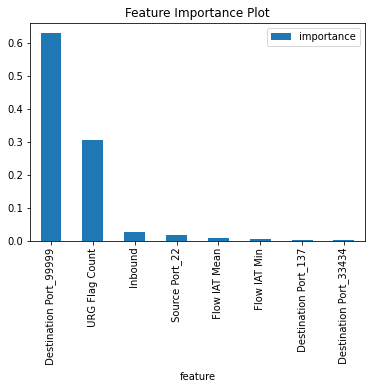

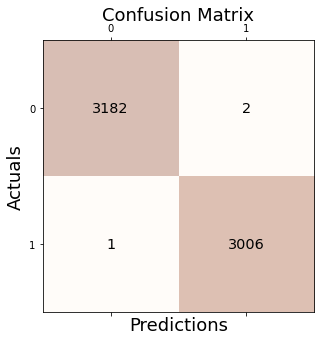

0.9995154256178324

In [ ]:
final_01_df = final_df.copy()
final_01_df[' Label'] = final_df[' Label'] != 'BENIGN'

X = final_01_df.drop([' Label'], axis = 1)
y = final_01_df[' Label']

DecisionTree( X, y)

### Detect what kind of attack or BENIGN

K-Fold Decision Tree: 
k0 - accuracy: 0.9612403100775194
k1 - accuracy: 0.9578488372093024
k2 - accuracy: 0.9631782945736435
k3 - accuracy: 0.9665697674418605
k4 - accuracy: 0.9597673291323315
k5 - accuracy: 0.9641299079011149
k6 - accuracy: 0.9612215220552593
k7 - accuracy: 0.9631604459524964
k8 - accuracy: 0.9641299079011149
k9 - accuracy: 0.9612215220552593

Avg accuracy : 0.9622467844299903

General Decision Tree: 
accuracy: 0.9638184461314812


              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      3117
        LDAP       0.98      0.99      0.99       446
       MSSQL       0.97      0.92      0.94       431
     NetBIOS       0.96      0.99      0.97       428
     Portmap       0.86      0.83      0.85       431
         Syn       0.95      0.94      0.94       457
         UDP       0.91      0.93      0.92       461
      UDPLag       0.87      0.88      0.88       420

    accuracy                           0.96      6191
   m

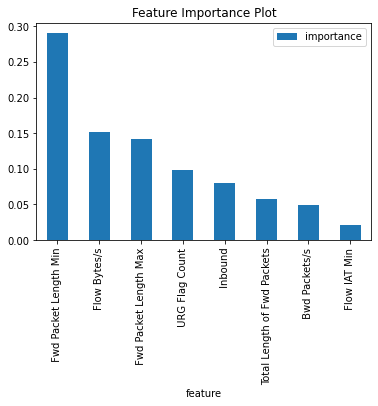

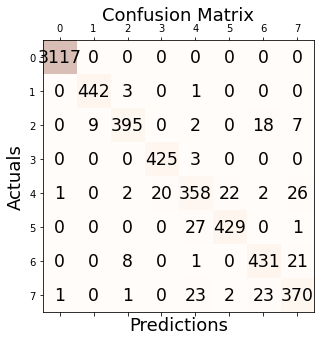

0.9638184461314812

In [ ]:
X = final_df.drop([' Label'], axis = 1)
y = final_df[' Label']

DecisionTree(X, y)


Random Forest Model

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3184
        True       1.00      1.00      1.00      3007

    accuracy                           1.00      6191
   macro avg       1.00      1.00      1.00      6191
weighted avg       1.00      1.00      1.00      6191



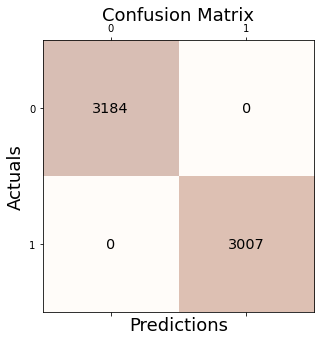

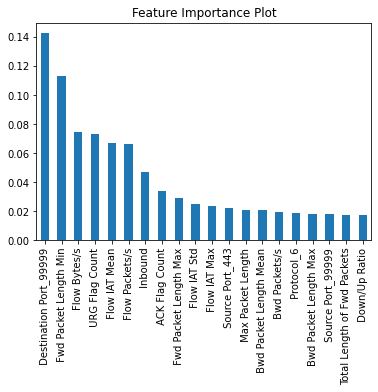

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# X = final_df.drop([' Label'], axis = 1)
# y = final_df[' Label']
final_01_df = final_df.copy()
final_01_df[' Label'] = final_df[' Label'] != 'BENIGN'

X = final_01_df.drop([' Label'], axis = 1)
y = final_01_df[' Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

rf_model = rf.fit(X, y)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test,y_pred))

visualize_confusion_matrix(y_true=y_test, y_pred=y_pred)

feature_importance_std = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Feature Importance Plot')

KNN Model

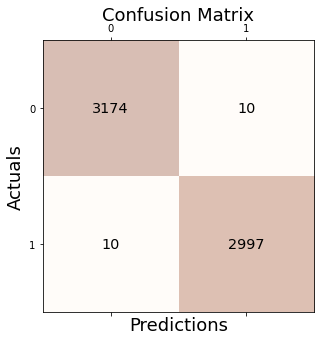

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3184
        True       1.00      1.00      1.00      3007

    accuracy                           1.00      6191
   macro avg       1.00      1.00      1.00      6191
weighted avg       1.00      1.00      1.00      6191



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

final_01_df = final_df.copy()
final_01_df[' Label'] = final_df[' Label'] != 'BENIGN'

X = final_01_df.drop([' Label'], axis = 1)
y = final_01_df[' Label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


knn = KNeighborsClassifier(n_neighbors=8)
knn_model = knn.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)
visualize_confusion_matrix(y_true=y_test, y_pred=y_pred)
print(classification_report(y_test,y_pred))